In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados.rename(columns=a_renomear, inplace=True)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_trcoar = {
    'no': 0,
    'yes': 1
}
dados['vendido'] = dados['vendido'].map(a_trcoar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados['ano_do_modelo']
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [5]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [6]:
dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1, inplace=True)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round(2)
print(f'A acurácia foi de {acuracia}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 58.0%.


/home/kevin/development/ide/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = (dummy_stratified.score(teste_x, teste_y) * 100).round(2)

print(f'A acurácia do dummy stratified foi de {acuracia}%.')

A acurácia do dummy stratified foi de 58.0%.


In [9]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = (dummy_stratified.score(teste_x, teste_y) * 100).round(2)

print(f'A acurácia do dummy stratified foi de {acuracia}%.')

A acurácia do dummy stratified foi de 58.0%.


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round(2)
print(f'A acurácia foi de {acuracia}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 77.48%.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.')

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = (accuracy_score(teste_y, previsoes) * 100).round(2)
print(f'A acurácia foi de {acuracia}%.')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 79.28%.


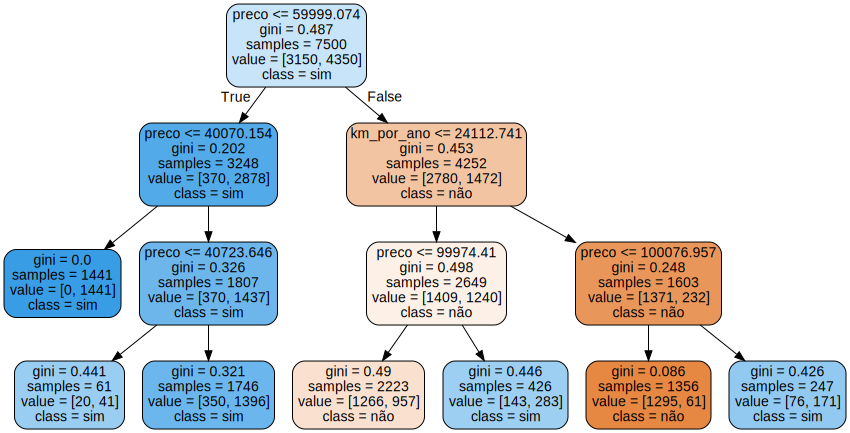

In [12]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, filled=True, rounded=True, feature_names=features, class_names = ['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico